Imports 

In [87]:
import pandas as pd
from sklearn.datasets import load_iris

Load Dataset 

In [88]:
iris = load_iris()

# Convert to pd DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] =iris.target
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])

# Explore 
print(df.head())
print('\n Class Labels', iris.target_names)
print('\n Feature Names', iris.feature_names)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  

 Class Labels ['setosa' 'versicolor' 'virginica']

 Feature Names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Train Model 

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [90]:
# Define features (X) and target (y)
X = df[iris.feature_names]
y = df['target']

# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Visualize the Tree 

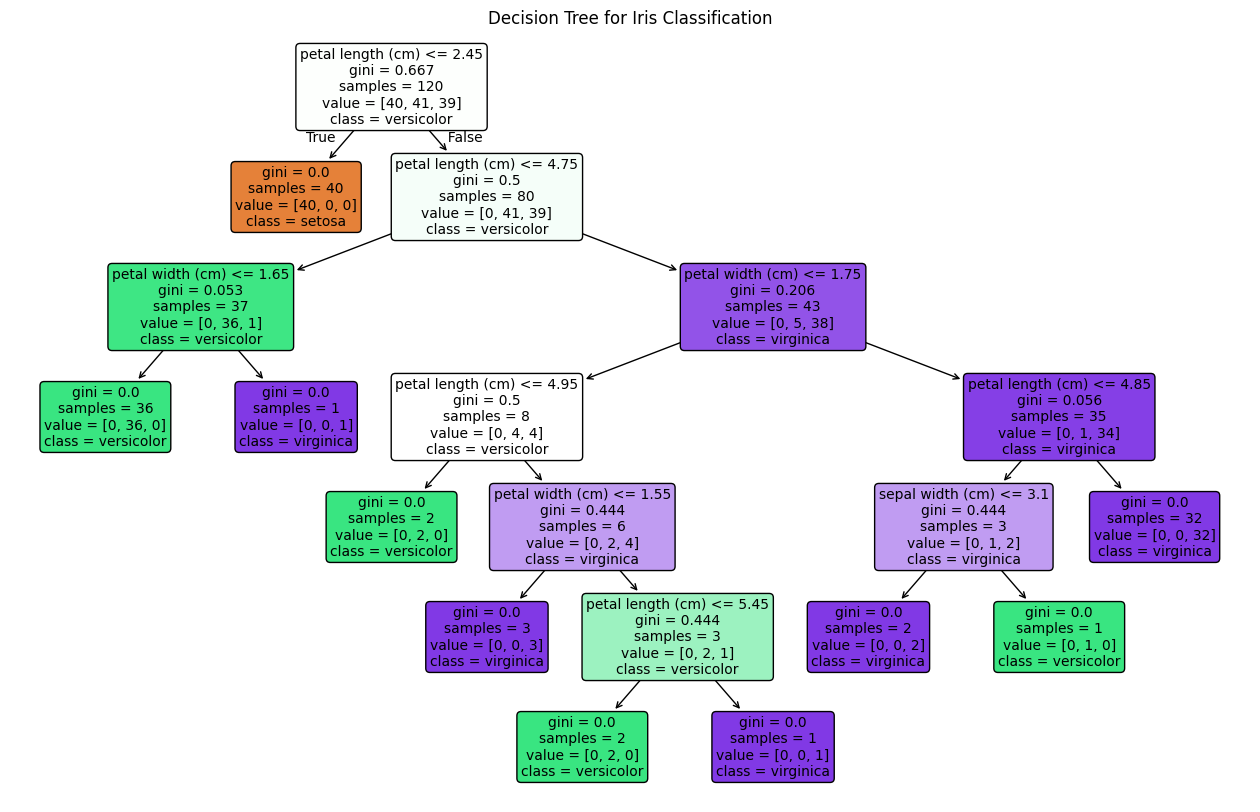

In [91]:
plt.figure(figsize=(16, 10))

plot_tree(model,
          feature_names= iris.feature_names,
          class_names= iris.target_names,
          filled=True,
          rounded=True)

# Plot
plt.title('Decision Tree for Iris Classification')
plt.show()

Pruning 

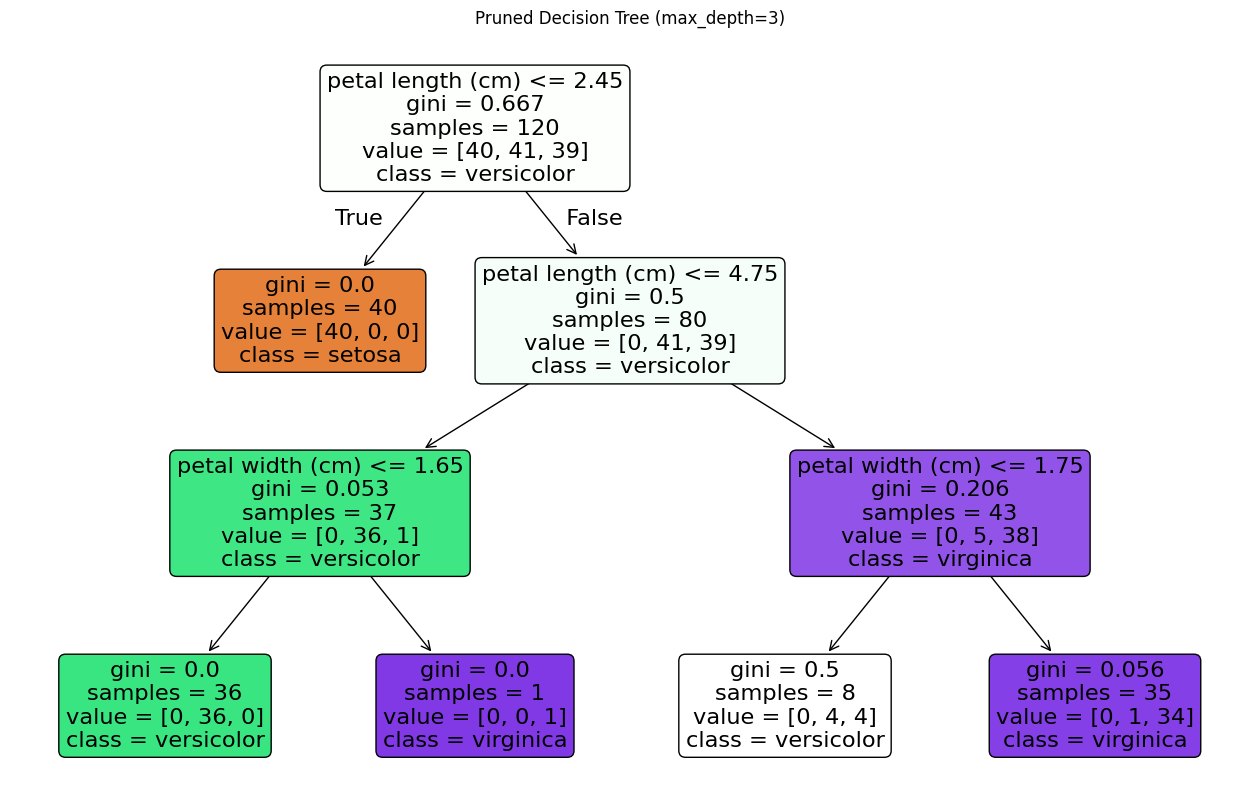

In [92]:
pruned_model = DecisionTreeClassifier(max_depth=3, random_state=42)
pruned_model.fit(X_train, y_train)

# Visualize pruned tree
plt.figure(figsize=(16,10))
plot_tree(pruned_model,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True)

plt.title('Pruned Decision Tree (max_depth=3)')
plt.show()

Evaluation 

Accuracy, Confusion matrix, Classification Report 

In [93]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [94]:
y_pred = pruned_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy', acc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)

# Classification Report
cr = classification_report(y_test, y_pred, target_names=iris.target_names)
print('Classification Report: \n', cr)

Accuracy 1.0
Confusion Matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

